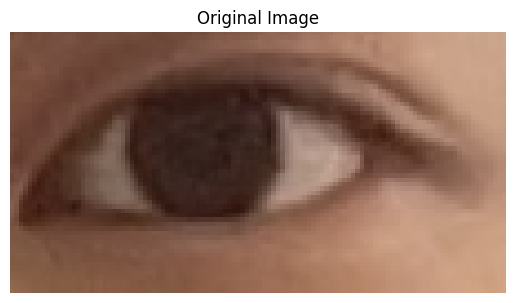

In [5]:
# Step 1: Load the original image
from matplotlib import pyplot as plt
import cv2

# Load the image
image = cv2.imread('eye.jpg')

# Convert BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


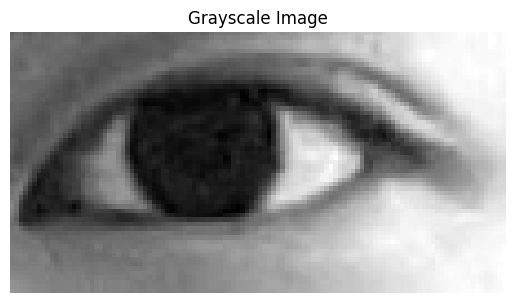

In [4]:
# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


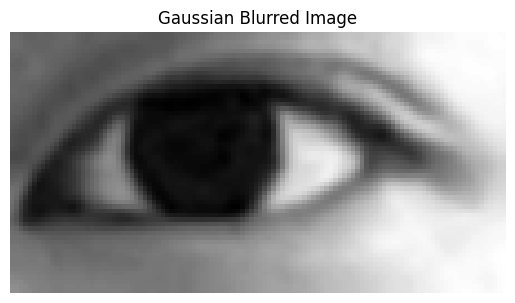

In [6]:
# Step 3: Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the blurred image
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()


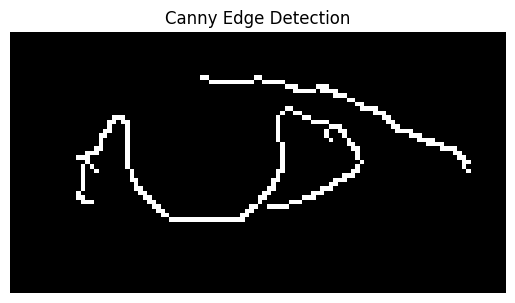

In [29]:
# Step 4: Apply Canny Edge Detection
edges = cv2.Canny(gaussian_blur, 40, 170)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


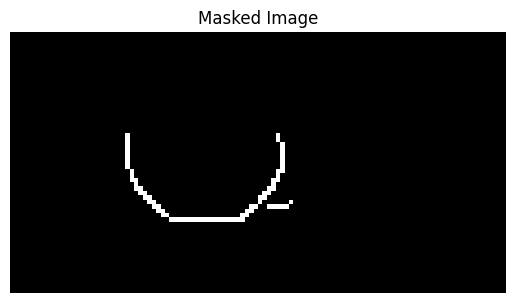

In [67]:
# Step 5: Mask the top and bottom with black
import numpy as np

mask = np.zeros_like(edges)
width = edges.shape[1]
height = edges.shape[0]
mask[int(height*0.4):int(height*0.90), int(width*0.2):int(width*0.58)] = 1

masked_edges = edges * mask

# Display the masked edges
plt.imshow(masked_edges, cmap='gray')
plt.title('Masked Image')
plt.axis('off')
plt.show()


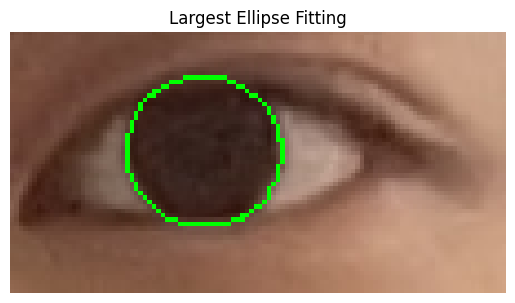

In [69]:
# Step 6: Ellipse Fitting
contours, _ = cv2.findContours(masked_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Find the largest contour by area
    largest_contour = max(contours, key=cv2.contourArea)
    
    if len(largest_contour) >= 5:  # Need at least 5 points to fit ellipse
        ellipse = cv2.fitEllipse(largest_contour)
        output = image.copy()
        cv2.ellipse(output, ellipse, (0, 255, 0), 1)

        # Convert BGR to RGB for display
        output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

        # Display the output image with the largest ellipse
        plt.imshow(output_rgb)
        plt.title('Largest Ellipse Fitting')
        plt.axis('off')
        plt.show()
    else:
        print("The largest contour does not have enough points to fit an ellipse.")
else:
    print("No contours found.")
